In [151]:
# Import necessary libraries for analysis
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.ticker import FuncFormatter
import warnings
warnings.filterwarnings("ignore")

In [152]:
weather_df = pd.read_csv('weather_data_clean.csv')
weather_df.shape
weather_df.head()

,date,high,low,precipitation,real feel,real feel shade,max uv index,wind
0,2024-07-24,21,19,1.00,24,21,4,11
1,2024-07-25,21,19,1.00,24,21,4,11
2,2024-07-26,23,19,0.96,28,24,5,9
3,2024-07-27,23,19,0.97,28,24,4,7
4,2024-07-28,20,19,0.95,24,22,4,6


Double check dtypes and for null values

In [153]:
weather_df.dtypes

date                object
high                 int64
low                  int64
precipitation      float64
real feel            int64
real feel shade      int64
max uv index         int64
wind                 int64
dtype: object

In [154]:
weather_df.isnull().sum()

date               0
high               0
low                0
precipitation      0
real feel          0
real feel shade    0
max uv index       0
wind               0
dtype: int64

In [155]:
# Remove year from date col, since we know the current year
# This is purely for analysis purposes
weather_df['date'] = pd.to_datetime(weather_df['date'])
weather_df['date'] = weather_df['date'].dt.strftime('%m-%d')

weather_df.head()

,date,high,low,precipitation,real feel,real feel shade,max uv index,wind
0,07-24,21,19,1.00,24,21,4,11
1,07-25,21,19,1.00,24,21,4,11
2,07-26,23,19,0.96,28,24,5,9
3,07-27,23,19,0.97,28,24,4,7
4,07-28,20,19,0.95,24,22,4,6


### Check for distribution of values with histogram plot

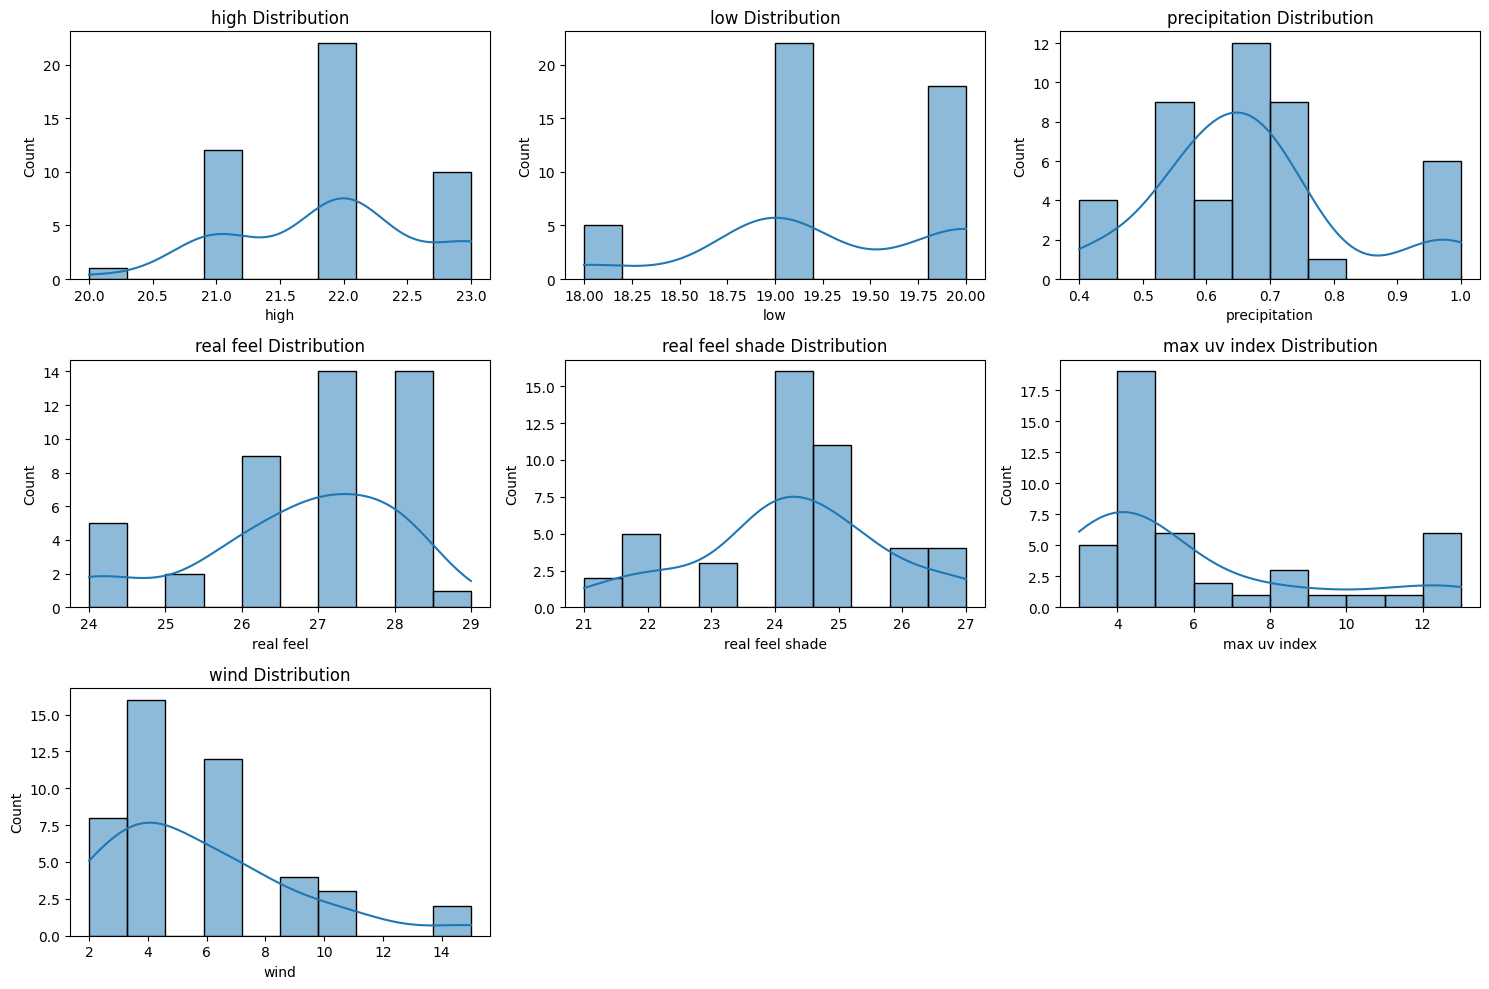

In [156]:
# Use a list of feature cols so we can easily graph per col
feature_cols = ['high', 'low', 'precipitation', 'real feel', 'real feel shade', 'max uv index', 'wind']

plot_cols = 3
plot_rows = len(feature_cols) // plot_cols + (len(feature_cols) % plot_cols > 0)

fig, axes = plt.subplots(plot_rows, plot_cols, figsize=(15, 10))

for i, col in enumerate(feature_cols):
    row = i // plot_cols
    col_pos = i % plot_cols
    sns.histplot(weather_df[col], bins=10, kde=True, ax=axes[row, col_pos])
    axes[row, col_pos].set_title(f'{col} Distribution')

# Remove any empty subplots
for j in range(i + 1, plot_rows * plot_cols):
    fig.delaxes(axes.flatten()[j])

plt.tight_layout()
plt.show()

> Judging from the distribution of values across all features, we can determine that there are irregularities in terms of weather factors within the upcoming 45 days. A clear example is the "biased" values of Max UV Index, Wind Speed, and Precipitation. This can be appointed to the real world effects of rainy seasons within the country.

### Plot High and Low

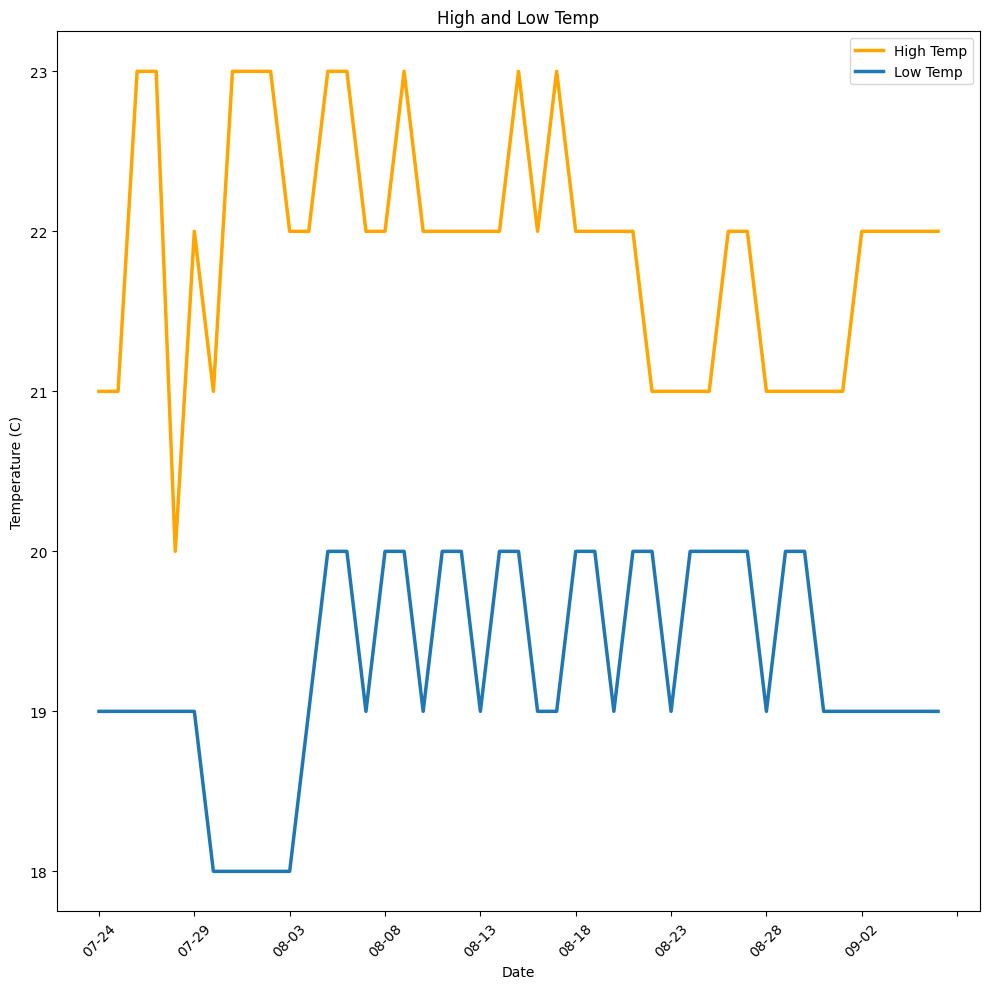

In [157]:
# Plot high and low temp vs date
plt.figure(figsize=(10, 10))
sns.lineplot(data=weather_df, x='date', y='high', label='High Temp', linewidth=2.5, color='orange')
sns.lineplot(data=weather_df, x='date', y='low', label='Low Temp', linewidth=2.5)
plt.xlabel('Date')
plt.ylabel('Temperature (C)')
plt.title('High and Low Temp')

# Set date format on x-axis
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=5))

plt.xticks(rotation=45)
plt.tight_layout()
plt.legend()
plt.show()

> The similar graphs of the Minimum (Low) and Maximum (High) temperatures within Baguio demonstrates a clear trend of alternating data with both features being indepenedent from one another. Despite having similar graphs, this does not instantly mean that these two (2) features are directly correlated with one another. 

> n.b., the accuracy of these values cannot be directly determined, but it is assured that these values came from a reputable source of weather data (Accuweather)

### Plot Precipitation Trend

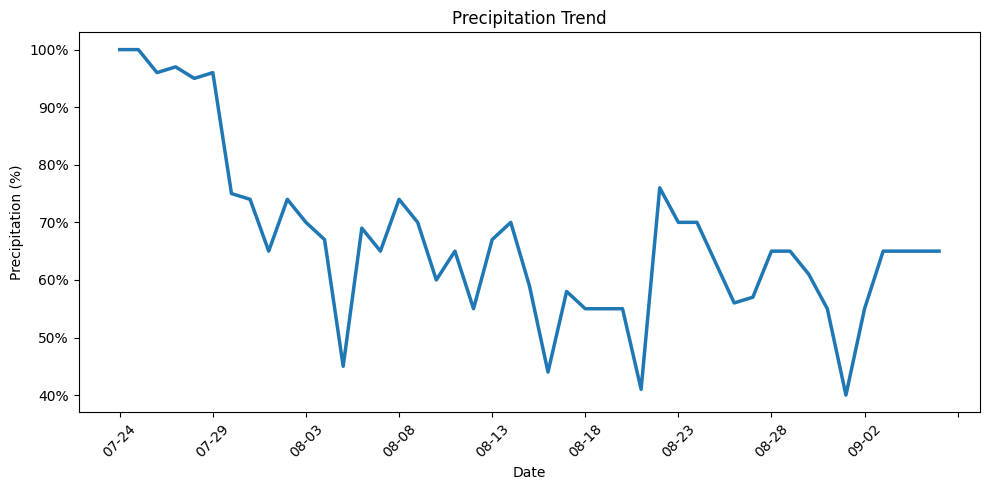

In [158]:
def percent(y, pos):
    return f'{y * 100:.0f}%'

# Plot precipitation trend
plt.figure(figsize=(10, 5))
sns.lineplot(data=weather_df, x='date', y='precipitation', linewidth=2.5)
plt.xlabel('Date')
plt.ylabel('Precipitation (%)')
plt.title('Precipitation Trend')

# Set date format on x-axis
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=5))

# Format y-axis labels as percentages
plt.gca().yaxis.set_major_formatter(FuncFormatter(percent))

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

> The trend line for Precipitation in Baguio is a clear downward trend; from 100% precipitation and averaging out to 60% - 70% in the next 45 days.

### Plot Real Feel and Real Feel (Shade)

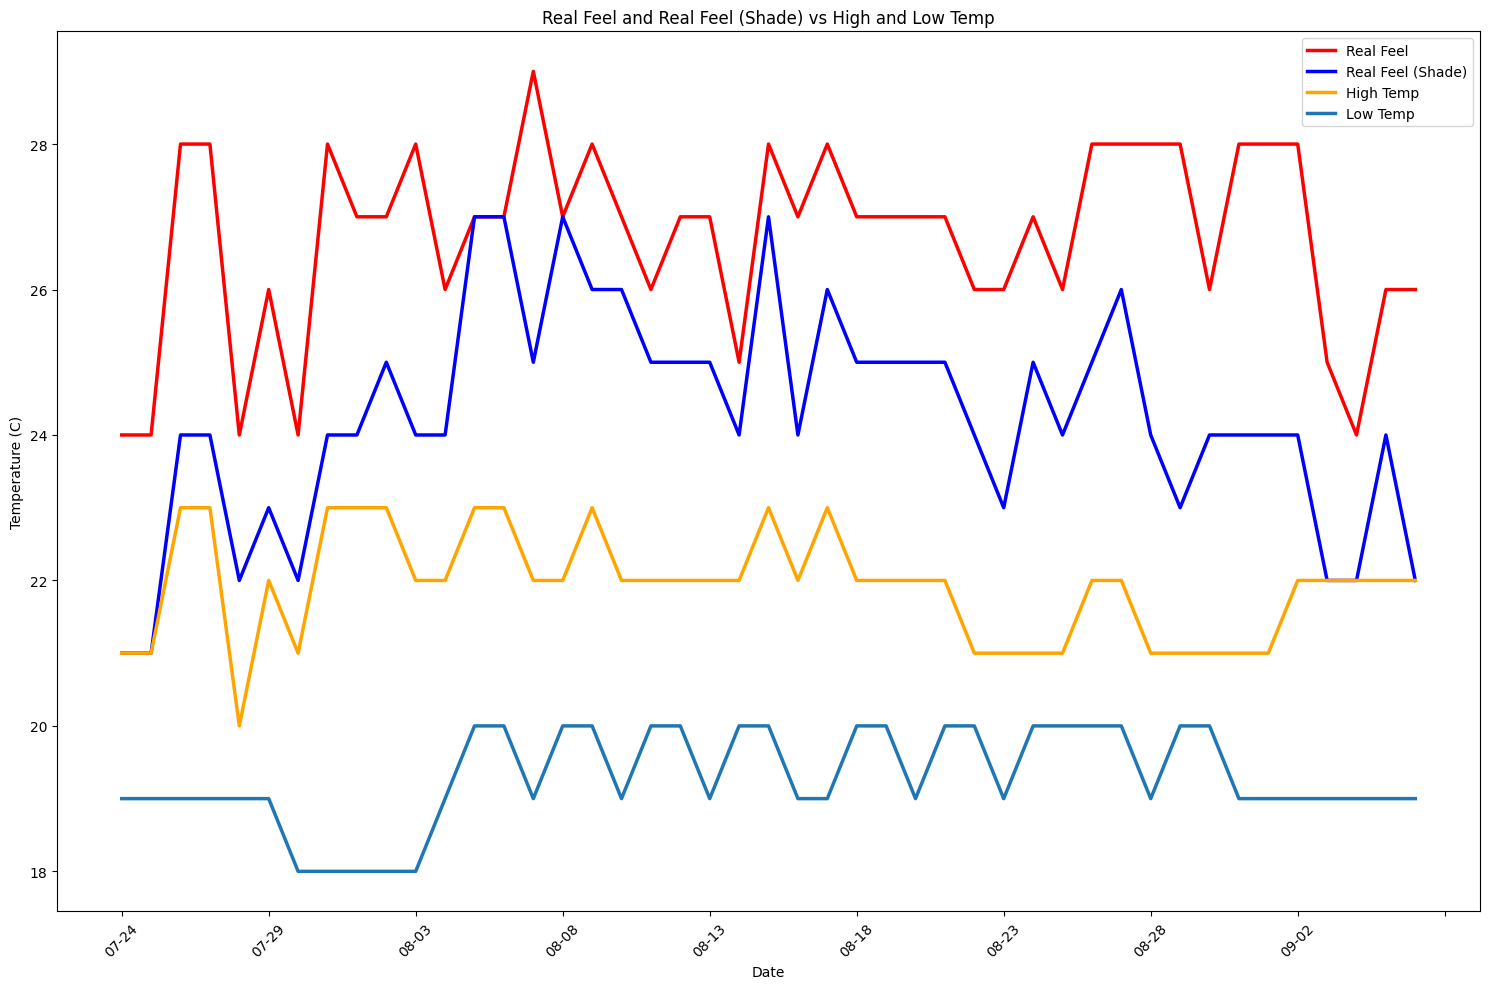

In [159]:
# Plot real feel and real feel shade
plt.figure(figsize=(15, 10))
sns.lineplot(data=weather_df, x='date', y='real feel', label='Real Feel', linewidth=2.5, color='red')
sns.lineplot(data=weather_df, x='date', y='real feel shade', label='Real Feel (Shade)', linewidth=2.5, color='blue')
sns.lineplot(data=weather_df, x='date', y='high', label='High Temp', linewidth=2.5, color='orange')
sns.lineplot(data=weather_df, x='date', y='low', label='Low Temp', linewidth=2.5)
plt.xlabel('Date')
plt.ylabel('Temperature (C)')
plt.title('Real Feel and Real Feel (Shade) vs High and Low Temp')

# Set date format on x-axis
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=5))

plt.xticks(rotation=45)
plt.tight_layout()
plt.legend()
plt.show()

>Based from the given graph of Real Feel and Real Feel (Shade) which just basically means what the actual temperature feels outdoors vs inside, we can see that there is a similar trend when overlayed with the values from the High and Low temperatures. It is observable that the trend lines for Real Feel, Real Feel (Shade), and High are more visible compared to the Low values. However, the correlation between Low values and the other three (3) features cannot be completely dismissed.

### Plot Max UV Index

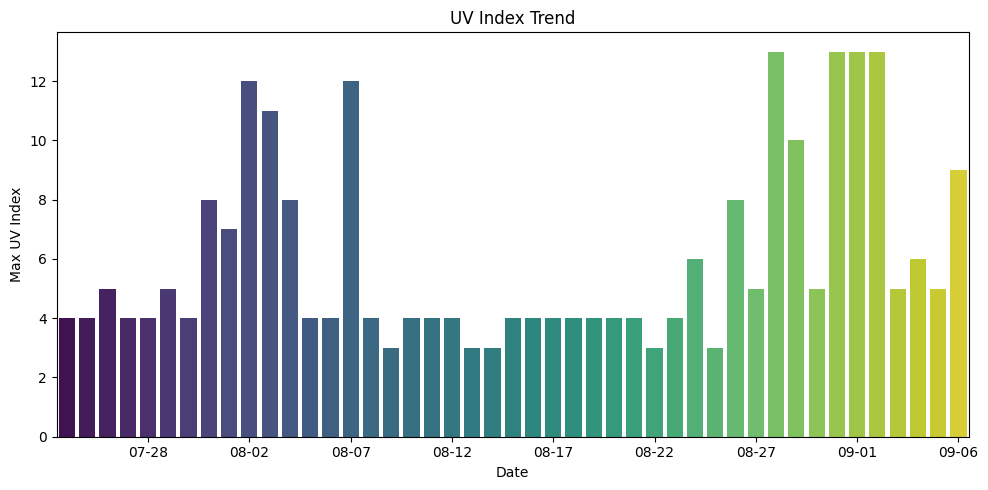

In [160]:
# Plot precipitation trend with color gradient
plt.figure(figsize=(10, 5))
sns.barplot(data=weather_df, x='date', y='max uv index', palette='viridis')
plt.xlabel('Date')
plt.ylabel('Max UV Index')
plt.title('UV Index Trend')

# Set date format on x-axis
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=5))

plt.tight_layout()
plt.show()

> The Max UV Index trend indicates that around the first week of August and September the Max UV Index will peak at dangerous levels in which this information alone can be a good indication for any necessary actions taken for the citizens of Baguio.

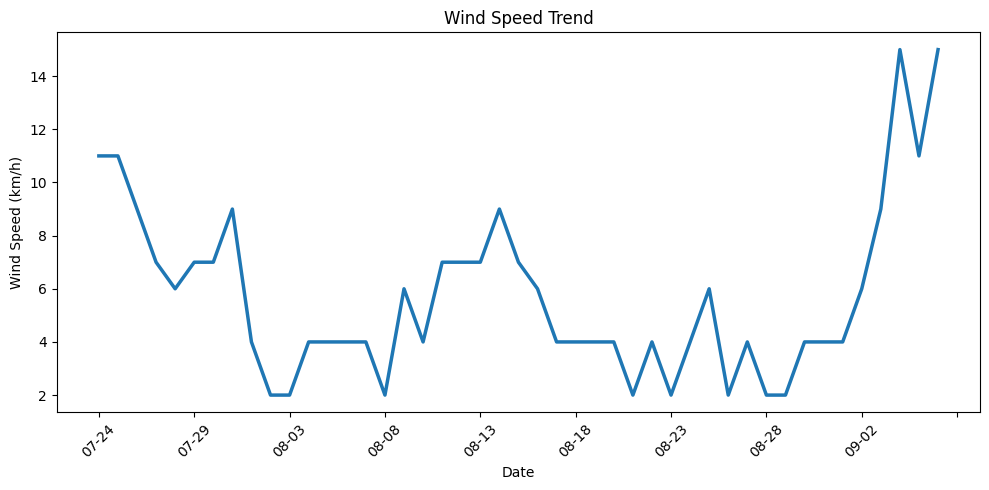

In [161]:
# Plot wind speed trend
plt.figure(figsize=(10, 5))
sns.lineplot(data=weather_df, x='date', y='wind', linewidth=2.5)
plt.xlabel('Date')
plt.ylabel('Wind Speed (km/h)')
plt.title('Wind Speed Trend')

# Set date format on x-axis
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=5))

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

> The wind speed trend can be compared to a familiar distribution shape; U-Shape distribution. However it is not a perfect U-shape distribution of values, with the actual values having peaks around the first week of August and fourth week of August. This suggests that higher wind speeds can be felt during the last week of July and specially during the first week of September.

### Correlation Matrix of every feature

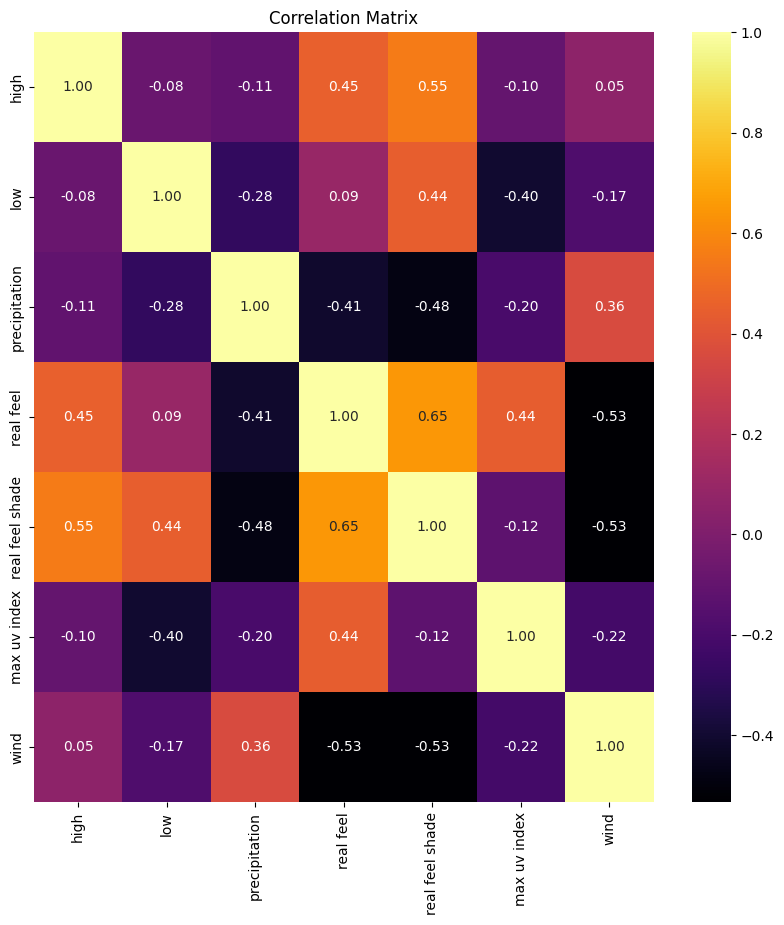

In [162]:
# Correlation matrix
# Completely drop date col since it's not needed for correlation
weather_df.drop(columns='date', inplace=True)


corr = weather_df.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(corr, annot=True, cmap='inferno', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

> Plotting out the features in a correlation matrix is a good way to determine the relationship of the features with one another. The legend on the right depicts the "heat" level at which the values are correlated. It can be seen that there are values that are 1.00 or directly correlated with one another diagonally mapped on the heatmap. These values are directly correlated with one another because the X and Y values are the same; we can disregard these 100% correlations for our analysis.

> The values that we are interested in are the values closer to 1.00 and -1.00.

#### High vs. Real Feel Shade (0.55) and Real Feel (0.45):

> There is a moderate positive correlation between the high temperature and both the real feel in the shade and the real feel. This suggests that as the high temperature increases, the real feel and real feel shade temperatures also tend to increase.

#### Real Feel vs. Real Feel Shade (0.65):

> There is a strong positive correlation between the real feel temperature and the real feel shade temperature. This indicates that these two measures of perceived temperature tend to move together closely.

#### Low vs. Real Feel Shade (0.44):

> There is a moderate positive correlation between the low temperature and the real feel shade temperature. This means that even lower temperatures have some influence on the perceived temperature in the shade.

#### Precipitation vs. Real Feel (-0.41) and Real Feel Shade (-0.48):

> There are moderate negative correlations between precipitation and both the real feel and real feel shade temperatures. This suggests that higher precipitation is associated with lower perceived temperatures.

#### Max UV Index vs. Real Feel (0.44):

> There is a moderate positive correlation between the maximum UV index and the real feel temperature. This implies that higher UV levels are associated with higher perceived temperatures.

#### Wind vs. Real Feel (-0.53) and Real Feel Shade (-0.53):

> There are moderate to strong negative correlations between wind speed and both the real feel and real feel shade temperatures. This indicates that stronger winds are associated with lower perceived temperatures.

#### Low vs. Wind (-0.17):

> There is a weak negative correlation between the low temperature and wind speed. This suggests a slight tendency for lower temperatures to be associated with higher wind speeds.

#### Precipitation vs. Max UV Index (-0.20):

> There is a weak negative correlation between precipitation and the maximum UV index. This suggests that higher precipitation tends to be associated with lower UV levels.

#### Precipitation vs. Wind (0.36):

> There is a moderate positive correlation between precipitation and wind speed. This indicates that higher precipitation tends to be associated with higher wind speeds.

## Identification of Feature Importance using Random Forest

In [163]:
# import Random Forest
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Split data into features and target (temperature is the target)
X = weather_df.drop(columns=['high', 'low'])

feature_names = X.columns
y_high = weather_df['high']
y_low = weather_df['low']

scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)


# Split data into training and testing sets
X_train, X_test, y_train_high, y_test_high = train_test_split(X_normalized, y_high, test_size=0.2, random_state=42)

X_train, X_test, y_train_low, y_test_low = train_test_split(X_normalized, y_low, test_size=0.2, random_state=42)

models = {
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Linear Regression': LinearRegression()
}


### For High Tempt.

In [164]:

models['Random Forest'].fit(X_train, y_train_high)
models['Linear Regression'].fit(X_train, y_train_high)

 # Random Forest
importances = models['Random Forest'].feature_importances_
std = np.std([tree.feature_importances_ for tree in models['Random Forest'].estimators_], axis=0)

feature_importances = sorted(zip(feature_names, importances), key=lambda x: x[1], reverse=True)

print("Random Forest Feature Importances (High Temp)")
for feature, importance in feature_importances:
    print(f'{feature}: {importance}')
    
print("\n")    

# Linear Regression
coefficients = models['Linear Regression'].coef_

feature_coefficients = sorted(zip(feature_names, coefficients), key=lambda x: x[1], reverse=True)

print("Linear Regression Coefficients (High Temp)")
for feature, coefficient in feature_coefficients:
    print(f'{feature}: {coefficient}')

print("\n")

Random Forest Feature Importances (High Temp)
real feel shade: 0.2448580691578282
precipitation: 0.24074183339658195
real feel: 0.23545309545112938
max uv index: 0.1442846647150501
wind: 0.1346623372794105


Linear Regression Coefficients (High Temp)
real feel shade: 0.5302813619855049
wind: 0.40041962160050204
real feel: 0.25758535402981736
precipitation: 0.19074386191657783
max uv index: 0.06049325943516923




### For Low Tempt.

In [165]:

models['Random Forest'].fit(X_train, y_train_low)
models['Linear Regression'].fit(X_train, y_train_low)

 # Random Forest
importances = models['Random Forest'].feature_importances_
std = np.std([tree.feature_importances_ for tree in models['Random Forest'].estimators_], axis=0)

feature_importances = sorted(zip(feature_names, importances), key=lambda x: x[1], reverse=True)

print("Random Forest Feature Importances (Low Temp)")
for feature, importance in feature_importances:
    print(f'{feature}: {importance}')
    
print("\n")    

# Linear Regression
coefficients = models['Linear Regression'].coef_

feature_coefficients = sorted(zip(feature_names, coefficients), key=lambda x: x[1], reverse=True)

print("Linear Regression Coefficients (Low Temp)")
for feature, coefficient in feature_coefficients:
    print(f'{feature}: {coefficient}')

print("\n")

Random Forest Feature Importances (Low Temp)
precipitation: 0.3223544679001202
max uv index: 0.31818535043557045
real feel shade: 0.16128243849749524
wind: 0.13793196570096097
real feel: 0.06024577746585311


Linear Regression Coefficients (Low Temp)
real feel shade: 0.16828752013561837
real feel: -0.014727431454706286
wind: -0.021823544141564677
precipitation: -0.14843783963219803
max uv index: -0.27600783630013115


